!pip install rpy2==3.5.1

In [2]:
%load_ext rpy2.ipython

In [3]:
%%R 
### 여기는 R처럼 쓸 수 있다. 
a <- c(1,2,3) 
a+1

[1] 2 3 4


In [5]:
%%R
library(tidyverse)
write_csv(mpg,"mpg.csv")


✔ tibble  3.2.1     ✔ dplyr   1.1.2
✔ tidyr   1.3.0     ✔ stringr 1.4.1
✔ readr   2.1.4     ✔ forcats 1.0.0

✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



# plotnine

In [6]:
import pandas as pd
from plotnine import *

In [7]:
mpg = pd.read_csv("mpg.csv")

`-` 데이터 설명

* displacement : 자동차의 엔진 크기

* hwy : 연료의 효율, 동일한 연료로 얼마나 많이 가는가

##  기본 2차원의 산점도

In [10]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


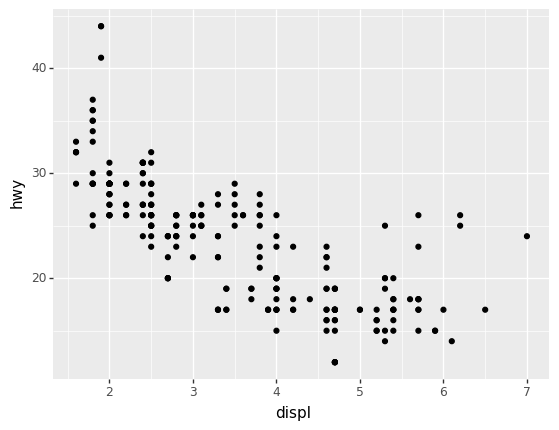

<ggplot: (8759067292480)>

In [9]:
ggplot(data = mpg) \
  + geom_point(aes(x= "displ", y = "hwy"))

`-` 산점도를 보고 엔진크기와 연료 효율은 반비례 관계임을 알 수 있다.

## 산점도 응용 (3차원)

In [11]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


`-` class도 함께 표시하면 데이터를 탐색할 때 좀 더 좋을 것 같다.

### 산점도 + 점크기 변경

/usr/local/lib/python3.10/dist-packages/plotnine/scales/scale_size.py:48: PlotnineWarning: Using size for a discrete variable is not advised.


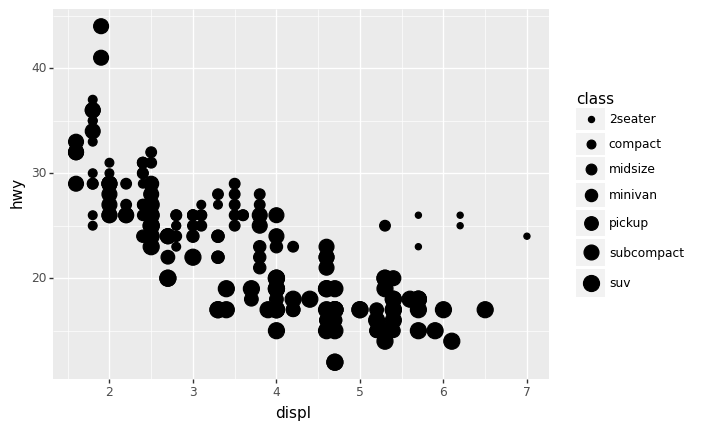

<ggplot: (8759061901174)>

In [12]:
ggplot(data = mpg) \
  + geom_point(aes(x="displ",y="hwy",size = "class"))

### 산점도 + 투명도 변경

/usr/local/lib/python3.10/dist-packages/plotnine/scales/scale_alpha.py:68: PlotnineWarning: Using alpha for a discrete variable is not advised.


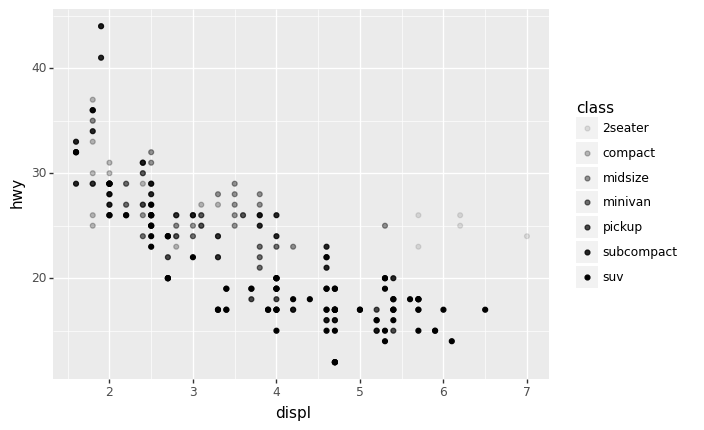

<ggplot: (8759061767796)>

In [14]:
ggplot(data = mpg) \
  + geom_point(aes(x="displ",y="hwy",alpha = "class"))

### 산점도 + 투명도 + 점크기 변경

/usr/local/lib/python3.10/dist-packages/plotnine/scales/scale_size.py:48: PlotnineWarning: Using size for a discrete variable is not advised.
/usr/local/lib/python3.10/dist-packages/plotnine/scales/scale_alpha.py:68: PlotnineWarning: Using alpha for a discrete variable is not advised.


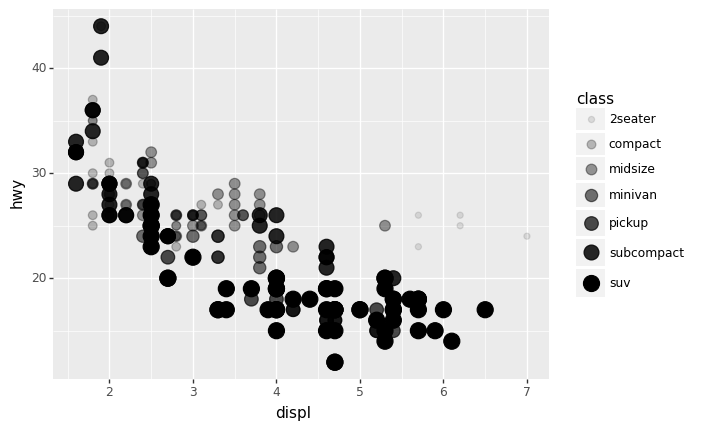

<ggplot: (8759061696531)>

In [15]:
ggplot(mpg) \
    + geom_point(aes(x="displ",y="hwy",size="class",alpha="class"))

### 산점도 + 형태

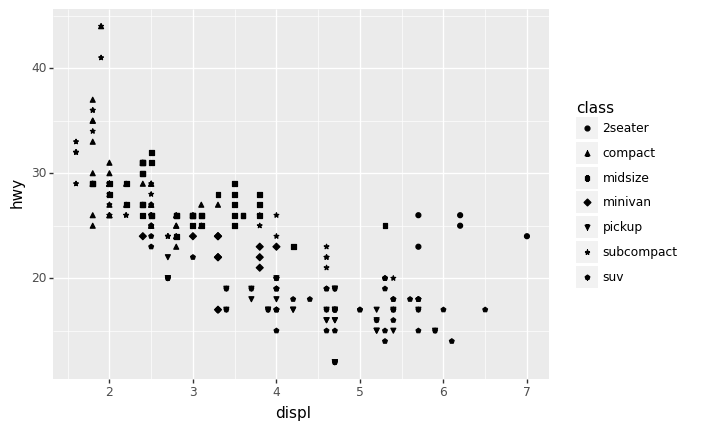

<ggplot: (8759061754028)>

In [16]:
ggplot(mpg) \
    + geom_point(aes(x="displ",y="hwy",shape="class"))

### 산점도 + 색깔

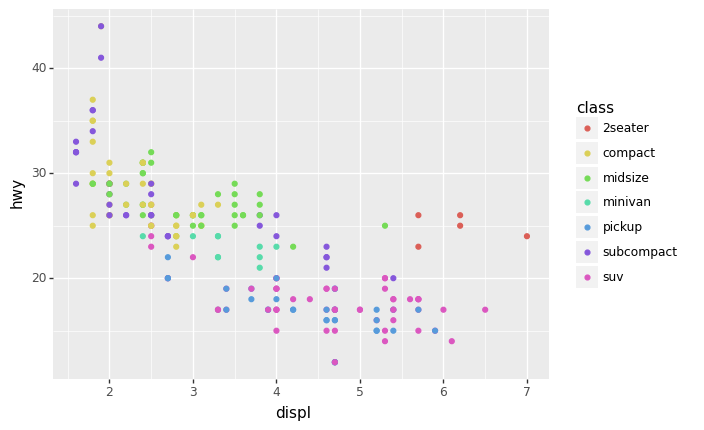

<ggplot: (8759061683729)>

In [17]:
ggplot(mpg) \
    + geom_point(aes(x="displ",y="hwy",color="class"))

### 산점도 + 색깔 + 스무딩

In [18]:
import warnings
warnings.filterwarnings("ignore")

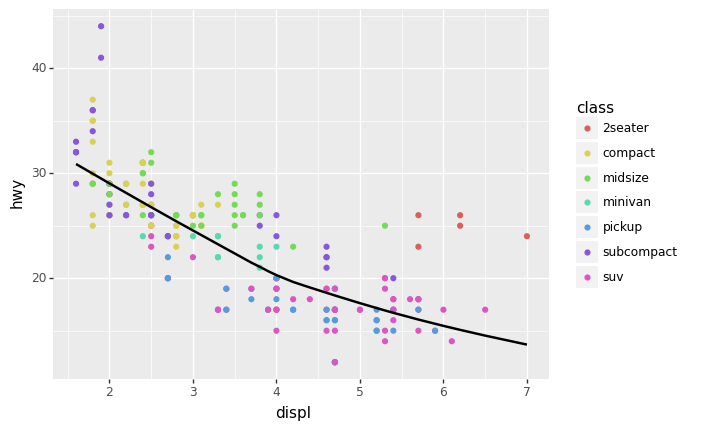

<ggplot: (8759061598184)>

In [19]:
ggplot(mpg,aes(x="displ",y="hwy")) \
    + geom_point(aes(color="class")) \
    + geom_smooth()

## 산점도 응용(4차원)

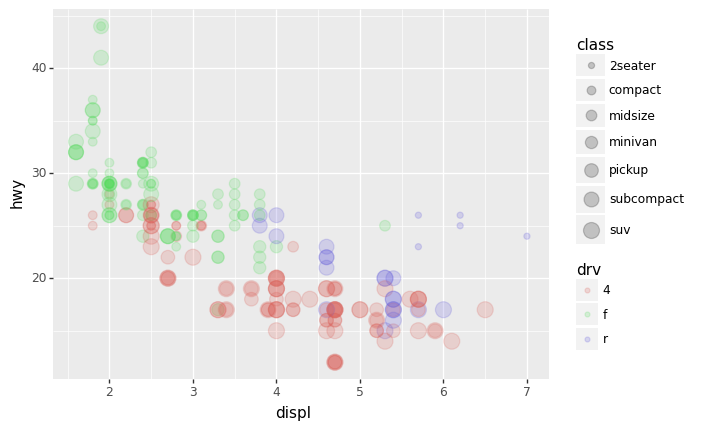

<ggplot: (8759061586275)>

In [20]:
(
ggplot(mpg) 
    +geom_point(aes(x="displ",y="hwy",size="class",color="drv"),alpha=0.2)
)

`-` 해석 : 모든 $x$에 대하여 붉은색 점들이 대부분 초록색 점과 보라색 점들에 비해 아래쪽에 위치에 있음 $\to$ 4륜 구동방식이 연비가 좋지 않음

### smooth 추가

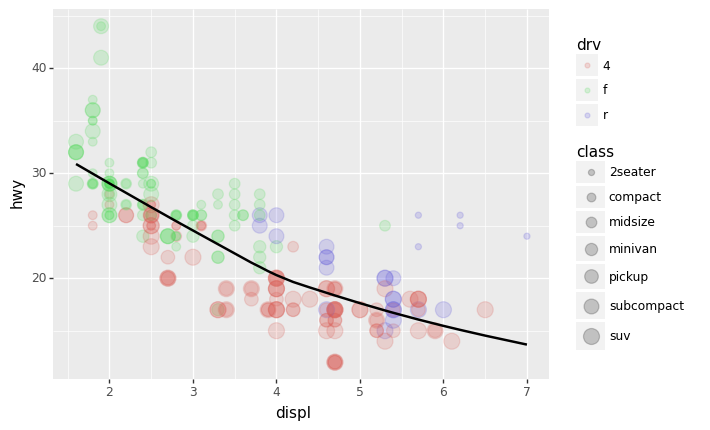

<ggplot: (8759103927486)>

In [21]:
(
ggplot(mpg,aes(x="displ",y="hwy")) 
    +geom_point(aes(color="drv",size="class"),alpha=0.2)
    +geom_smooth()
)

### 구동방식에 따라 smooth 따로 그리기`

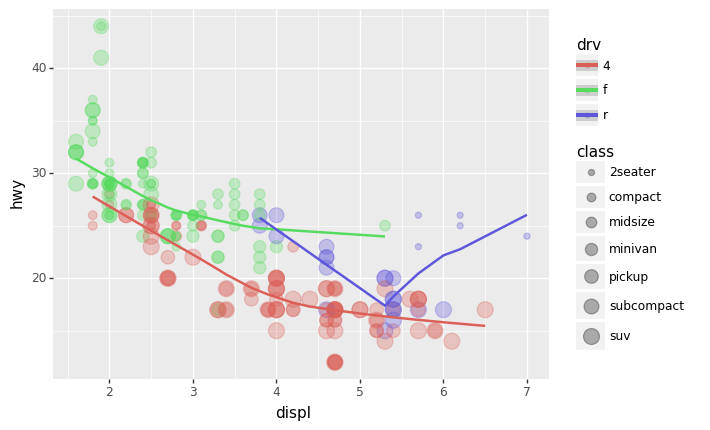

<ggplot: (8759061774472)>

In [22]:
(
ggplot(mpg,aes(x="displ",y="hwy")) +
    geom_point(aes(color="drv",size="class"),alpha=0.3) +
    geom_smooth(aes(color="drv"))
)

#### 구동방식 별로 선의 색깔은 동일시 하되 타입을 변경하기

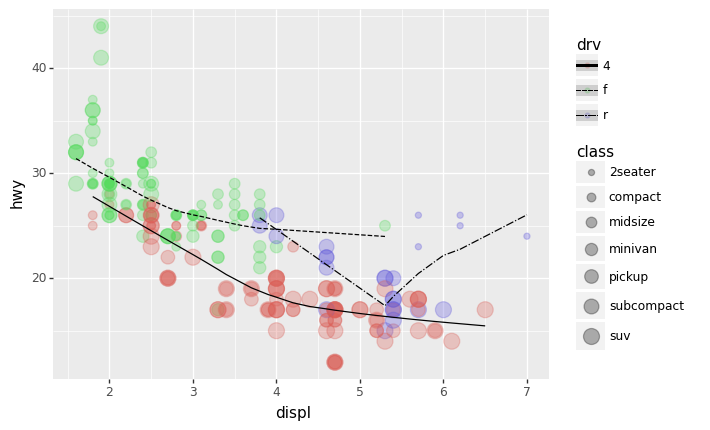

<ggplot: (8759059312481)>

In [23]:
(
ggplot(mpg,aes(x="displ",y="hwy")) +
  geom_point(aes(color="drv",size="class"),alpha=0.3) +
    geom_smooth(aes(linetype="drv"),size=0.5)
)

## Summary

`-` 고차원 변수를 표현할 수 있는 무기는 다양하다.
  * 산점도 : 점의 크기, 형태, 색깔, 투명도
  * 라인플랏 : 선의 형태, 색깔, 굵기

`-` geom과 mapping만 잘 이용해도 아주 다양한 그래프를 그릴 수 있음.

# Pandas에서 column을 선택하는 방법

In [24]:
import pandas as pd
import numpy as np

In [26]:
dic = {"X1" : np.random.normal(0,1,5),
       "X2" : np.random.normal(0,1,5),
       "X3" : np.random.normal(0,1,5),
       }

In [27]:
df = pd.DataFrame(dic)

In [28]:
df

,X1,X2,X3
0,-0.212599,1.101194,-0.664679
1,0.079671,-0.414452,-0.488383
2,0.296181,0.454763,0.134122
3,1.051856,-0.070905,-1.178389
4,-0.463166,1.295350,-0.917368


## 방법 1

In [29]:
df.X1

0   -0.212599
1    0.079671
2    0.296181
3    1.051856
4   -0.463166
Name: X1, dtype: float64

## 방법 2

In [30]:
df["X1"]

0   -0.212599
1    0.079671
2    0.296181
3    1.051856
4   -0.463166
Name: X1, dtype: float64

## 방법 3

In [31]:
df[["X1"]]

,X1
0,-0.212599
1,0.079671
2,0.296181
3,1.051856
4,-0.463166


`-` `df["X1"]`은 serise를 리턴하고 `df[["X1"]]` 은 데이터프레임을 리턴한다.

## 방법 4

In [34]:
df.loc[:, "X1"]

0   -0.212599
1    0.079671
2    0.296181
3    1.051856
4   -0.463166
Name: X1, dtype: float64

## 방법 5

In [35]:
df.loc[:,["X1"]]

,X1
0,-0.212599
1,0.079671
2,0.296181
3,1.051856
4,-0.463166


## 방법 6

In [36]:
df.loc[:, [True, False, False]]

,X1
0,-0.212599
1,0.079671
2,0.296181
3,1.051856
4,-0.463166


In [37]:
df.iloc[:,0:2]

,X1,X2
0,-0.212599,1.101194
1,0.079671,-0.414452
2,0.296181,0.454763
3,1.051856,-0.070905
4,-0.463166,1.295350


## 참고 : 열이름이 integer인 경우

In [38]:
_df = pd.DataFrame(np.array([[1,2,3],[4,5,6],[7,8,9]]))

In [39]:
_df

,0,1,2
0,1,2,3
1,4,5,6
2,7,8,9


In [40]:
_df.iloc[:,0:1]

,0
0,1
1,4
2,7


In [41]:
_df.loc[:,0:1]

,0,1
0,1,2
1,4,5
2,7,8


* 위를 보고 컬럼명이 intiger일경우 loc 와 iloc의 차이를 구별할 줄 알아야한다.

## 예제 : movie data - 특정 조건에 맞는 열을 선택

### `actor`라는 단어가 포함된 변수들만 뽑기

In [43]:
import pandas as pd

In [44]:
df = pd.read_csv("https://raw.githubusercontent.com/PacktPublishing/Pandas-Cookbook/master/data/movie.csv")

In [45]:
df.iloc[:,map(lambda x : "actor" in x, df.columns)]

,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,actor_1_name,actor_3_name,actor_2_facebook_likes
0,855.0,Joel David Moore,1000.0,CCH Pounder,Wes Studi,936.0
1,1000.0,Orlando Bloom,40000.0,Johnny Depp,Jack Davenport,5000.0
2,161.0,Rory Kinnear,11000.0,Christoph Waltz,Stephanie Sigman,393.0
3,23000.0,Christian Bale,27000.0,Tom Hardy,Joseph Gordon-Levitt,23000.0
4,NaN,Rob Walker,131.0,Doug Walker,NaN,12.0
...,...,...,...,...,...,...
4911,318.0,Daphne Zuniga,637.0,Eric Mabius,Crystal Lowe,470.0
4912,319.0,Valorie Curry,841.0,Natalie Zea,Sam Underwood,593.0
4913,0.0,Maxwell Moody,0.0,Eva Boehnke,David Chandler,0.0
4914,489.0,Daniel Henney,946.0,Alan Ruck,Eliza Coupe,719.0


### 변수 이름이 `s`로 끝나는 변수들만 뽑기

In [47]:
df.iloc[: , map(lambda x : "s" in x[-1],df.columns)]

,num_critic_for_reviews,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,genres,num_voted_users,cast_total_facebook_likes,plot_keywords,num_user_for_reviews,actor_2_facebook_likes,movie_facebook_likes
0,723.0,0.0,855.0,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,886204,4834,avatar|future|marine|native|paraplegic,3054.0,936.0,33000
1,302.0,563.0,1000.0,40000.0,309404152.0,Action|Adventure|Fantasy,471220,48350,goddess|marriage ceremony|marriage proposal|pi...,1238.0,5000.0,0
2,602.0,0.0,161.0,11000.0,200074175.0,Action|Adventure|Thriller,275868,11700,bomb|espionage|sequel|spy|terrorist,994.0,393.0,85000
3,813.0,22000.0,23000.0,27000.0,448130642.0,Action|Thriller,1144337,106759,deception|imprisonment|lawlessness|police offi...,2701.0,23000.0,164000
4,NaN,131.0,NaN,131.0,NaN,Documentary,8,143,NaN,NaN,12.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4911,1.0,2.0,318.0,637.0,NaN,Comedy|Drama,629,2283,fraud|postal worker|prison|theft|trial,6.0,470.0,84
4912,43.0,NaN,319.0,841.0,NaN,Crime|Drama|Mystery|Thriller,73839,1753,cult|fbi|hideout|prison escape|serial killer,359.0,593.0,32000
4913,13.0,0.0,0.0,0.0,NaN,Drama|Horror|Thriller,38,0,NaN,3.0,0.0,16
4914,14.0,0.0,489.0,946.0,10443.0,Comedy|Drama|Romance,1255,2386,NaN,9.0,719.0,660


### 변수 이름이 c 혹은 d로 시작하는 변수들만 뽑고싶다.

In [49]:
df.iloc[:,map(lambda x : "c" in x[0] or "d" in x[0],df.columns)]

,color,director_name,duration,director_facebook_likes,cast_total_facebook_likes,country,content_rating
0,Color,James Cameron,178.0,0.0,4834,USA,PG-13
1,Color,Gore Verbinski,169.0,563.0,48350,USA,PG-13
2,Color,Sam Mendes,148.0,0.0,11700,UK,PG-13
3,Color,Christopher Nolan,164.0,22000.0,106759,USA,PG-13
4,NaN,Doug Walker,NaN,131.0,143,NaN,NaN
...,...,...,...,...,...,...,...
4911,Color,Scott Smith,87.0,2.0,2283,Canada,NaN
4912,Color,NaN,43.0,NaN,1753,USA,TV-14
4913,Color,Benjamin Roberds,76.0,0.0,0,USA,NaN
4914,Color,Daniel Hsia,100.0,0.0,2386,USA,PG-13


In [50]:
df.iloc[:, map(lambda  x: ("c" in x[0]) | ("d" in x[0]), df.columns  )]

,color,director_name,duration,director_facebook_likes,cast_total_facebook_likes,country,content_rating
0,Color,James Cameron,178.0,0.0,4834,USA,PG-13
1,Color,Gore Verbinski,169.0,563.0,48350,USA,PG-13
2,Color,Sam Mendes,148.0,0.0,11700,UK,PG-13
3,Color,Christopher Nolan,164.0,22000.0,106759,USA,PG-13
4,NaN,Doug Walker,NaN,131.0,143,NaN,NaN
...,...,...,...,...,...,...,...
4911,Color,Scott Smith,87.0,2.0,2283,Canada,NaN
4912,Color,NaN,43.0,NaN,1753,USA,TV-14
4913,Color,Benjamin Roberds,76.0,0.0,0,USA,NaN
4914,Color,Daniel Hsia,100.0,0.0,2386,USA,PG-13


###  `face`라는 단어가 포함된 변수열을 선택하라.

In [51]:
df.iloc[:, map(lambda x : "face" in x, df.columns)]

,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,cast_total_facebook_likes,facenumber_in_poster,actor_2_facebook_likes,movie_facebook_likes
0,0.0,855.0,1000.0,4834,0.0,936.0,33000
1,563.0,1000.0,40000.0,48350,0.0,5000.0,0
2,0.0,161.0,11000.0,11700,1.0,393.0,85000
3,22000.0,23000.0,27000.0,106759,0.0,23000.0,164000
4,131.0,NaN,131.0,143,0.0,12.0,0
...,...,...,...,...,...,...,...
4911,2.0,318.0,637.0,2283,2.0,470.0,84
4912,NaN,319.0,841.0,1753,1.0,593.0,32000
4913,0.0,0.0,0.0,0,0.0,0.0,16
4914,0.0,489.0,946.0,2386,5.0,719.0,660
